<a href="https://colab.research.google.com/github/willschlitzer/fastai_lessons/blob/main/fastai_intro_00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install fastai
!pip install fastbook
!pip install fastdownload

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 719 kB 34.7 MB/s 
     |████████████████████████████████| 365 kB 28.1 MB/s 
     |████████████████████████████████| 4.7 MB 59.3 MB/s 
     |████████████████████████████████| 1.3 MB 66.6 MB/s 
     |████████████████████████████████| 115 kB 8.5 MB/s 
     |████████████████████████████████| 212 kB 59.3 MB/s 
     |████████████████████████████████| 141 kB 75.5 MB/s 
     |████████████████████████████████| 101 kB 16.1 MB/s 
     |████████████████████████████████| 596 kB 60.7 MB/s 
     |████████████████████████████████| 127 kB 76.5 MB/s 
     |████████████████████████████████| 6.6 MB 58.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Atte

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from fastai.vision.all import *
import fastbook
import fastdownload

In [5]:
path = untar_data(URLs.PETS)/'images'

In [6]:
def is_cat(x): return x[0].isupper()

In [7]:
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42, 
    label_func=is_cat, item_tfms=Resize(224))

In [8]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.172285,0.033115,0.010149,00:58


epoch,train_loss,valid_loss,error_rate,time
0,0.057575,0.014794,0.006089,01:06


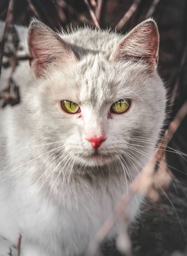

In [9]:
urls = fastbook.search_images_ddg('cat photos', max_images=10)
#len(urls), urls[0]

dest = 'cat.jpg'
fastdownload.download_url(urls[0], dest, show_progress=False)

im = Image.open(dest)
im.to_thumb(256,256)

In [10]:
is_cat,_,probs = learn.predict(PILImage.create('cat.jpg'))
print(f"This is a cat: {is_cat}.")
print(f"Probability it's a cat: {probs[1]:.4f}")

This is a cat: True.
Probability it's a cat: 1.0000


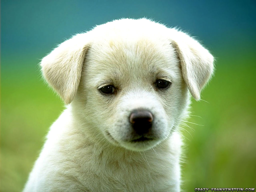

In [11]:
urls = fastbook.search_images_ddg('dog photos', max_images=10)
#len(urls), urls[0]

dest = 'dog.jpg'
fastdownload.download_url(urls[0], dest, show_progress=False)

im = Image.open(dest)
im.to_thumb(256,256)

In [12]:
is_cat,_,probs = learn.predict(PILImage.create('dog.jpg'))
print(f"This is a cat: {is_cat}.")
print(f"Probability it's a cat: {probs[1]:.4f}")

This is a cat: False.
Probability it's a cat: 0.0000


Segmentation training

In [13]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames=get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str))

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)
#learn.fine_tune(25)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1121: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The cur

epoch,train_loss,valid_loss,time
0,2.696301,2.152175,00:01


epoch,train_loss,valid_loss,time
0,1.727667,1.521654,00:01
1,1.503865,1.293909,00:01
2,1.391526,1.141711,00:01
3,1.273963,1.024836,00:01
4,1.153535,0.893908,00:01
5,1.047982,0.848480,00:01
6,0.958554,0.839141,00:01
7,0.886816,0.833848,00:01


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1121: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


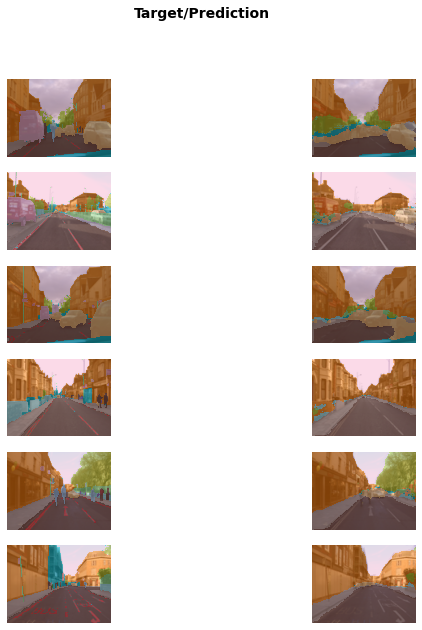

In [14]:
learn.show_results(max_n=6, figsize=(10,10))

NLP

In [15]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy,)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.464350,0.389848,0.826560,03:25


epoch,train_loss,valid_loss,accuracy,time
0,0.308380,0.241534,0.904120,07:09
1,0.243732,0.219825,0.917440,07:09
2,0.181921,0.205251,0.924560,07:09
3,0.147042,0.196078,0.928240,07:08


In [16]:
learn.predict('That was a good movie')

('pos', tensor(1), tensor([0.1250, 0.8750]))

In [17]:
learn.predict("I wish I saw another movie")

('pos', tensor(1), tensor([0.0256, 0.9744]))

In [19]:
learn.predict("I thought the plot was confusing")

('pos', tensor(1), tensor([0.4051, 0.5949]))